<a href="https://colab.research.google.com/github/arunsankerns/Data_Science_Projects/blob/main/Chennai_House_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import** **Libraries**

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

**Import the dataset**

In [90]:
df=pd.read_csv("/content/drive/MyDrive/DS PROJECT/train-chennai-sale.csv")

In [91]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [92]:
df.tail()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.52,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.92,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.84,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.16,425350,119098,8507000
7108,P09794,Velachery,1896,13-07-2005,156,3.0,2.0,5,Partial,Yes,...,ELO,Paved,I,3.1,3.5,4.3,3.64,349177,79812,9976480


In [93]:
df.shape

(7109, 22)

We have 7109 rows and 22 columns in the dataframe.


*   Out of 22 columns the last column ie, 'SALES PRICE' is the target column.
*   Out of the rest 21 columns we cannot consider all columns as target columns. Some of the columns are irrelevant for predicting sales price.

*   "PRT ID" column can be droped from the dataframe as it is a collection of uneque values.
*   "REG FEE" and "COMMIS" columns also can also be droped as they refer to 'registration fee' and 'agent commission' which can be variable with govt policies and agents to agent respectively. 













In [94]:
df1 = df.copy()

In [95]:
df1 = df1.drop(["PRT_ID","REG_FEE","COMMIS"], axis = 1)

***We can now check each catagorical columns for any spelling errors, and we need to fix them. So we will be printing uneque values of each catagorical column and then try to correct the errors.***



**AREA** column

In [96]:
#AREA column

column_values = df1["AREA"].values.ravel()
unique_values =  pd.unique(column_values)
print(unique_values)

['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']


In [97]:
df1['AREA'] = df1['AREA'].replace(['TNagar','Chrompt','Chrmpet','Karapakam','Ana Nagar','Chormpet','Adyr','Velchery','Ann Nagar','KKNagar'],
                                          ['T Nagar','Chrompet','Chrompet','Karapakkam','Anna Nagar','Chrompet','Adyar','Velachery','Anna Nagar','KK Nagar'])

In [98]:
#SALE_COND column

column_values = df1["SALE_COND"].values.ravel()
unique_values =  pd.unique(column_values)
print(unique_values)

['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']


In [99]:
df1['SALE_COND'] = df1['SALE_COND'].replace(['Ab Normal','Partiall','Adj Land','PartiaLl'],['AbNormal','Partial','AdjLand','Partial'])
sns.set_style(style='dark')

In [100]:
#PARK_FACIL column

column_values = df1["PARK_FACIL"].values.ravel()
unique_values =  pd.unique(column_values)
print(unique_values)

['Yes' 'No' 'Noo']


In [101]:
df1['PARK_FACIL'] = df1['PARK_FACIL'].replace('Noo','No')

In [102]:
#BUILDTYPE column

column_values = df1["BUILDTYPE"].values.ravel()
unique_values =  pd.unique(column_values)
print(unique_values)

['Commercial' 'Others' 'Other' 'House' 'Comercial']


In [103]:
df1['BUILDTYPE'] = df1['BUILDTYPE'].replace(['Other','Comercial'],['Others','Commercial'])

In [104]:
#UTILITY_AVAIL

column_values = df1["UTILITY_AVAIL"].values.ravel()
unique_values =  pd.unique(column_values)
print(unique_values)

['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']


In [105]:
df1['UTILITY_AVAIL'] = df1['UTILITY_AVAIL'].replace(['All Pub','NoSewr ','NoSewr'],['AllPub','NoSeWa','NoSeWa'])

In [106]:
#STREET column

column_values = df1["STREET"].values.ravel()
unique_values =  pd.unique(column_values)
print(unique_values)

['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']


In [107]:
df1['STREET'] = df1['STREET'].replace(['Pavd','NoAccess'],['Paved','No Access'])

In [108]:
#MZZONE column

column_values = df1["MZZONE"].values.ravel()
unique_values =  pd.unique(column_values)
print(unique_values)

['A' 'RH' 'RL' 'I' 'C' 'RM']


**MZZONE** *column has no errors so no need to replace.*

**Now check for the datatypes of each column and fix the wrong datatypes**






In [109]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DATE_SALE      7109 non-null   object 
 3   DIST_MAINROAD  7109 non-null   int64  
 4   N_BEDROOM      7108 non-null   float64
 5   N_BATHROOM     7104 non-null   float64
 6   N_ROOM         7109 non-null   int64  
 7   SALE_COND      7109 non-null   object 
 8   PARK_FACIL     7109 non-null   object 
 9   DATE_BUILD     7109 non-null   object 
 10  BUILDTYPE      7109 non-null   object 
 11  UTILITY_AVAIL  7109 non-null   object 
 12  STREET         7109 non-null   object 
 13  MZZONE         7109 non-null   object 
 14  QS_ROOMS       7109 non-null   float64
 15  QS_BATHROOM    7109 non-null   float64
 16  QS_BEDROOM     7109 non-null   float64
 17  QS_OVERALL     7061 non-null   float64
 18  SALES_PR

***Datatype of some of the columns are not as expected.***

***We need to convert them into desired datatypes.***

***Before that we need to deal with the null values associated with some columns.***

***Let's check for null values.***

In [110]:
df1.isna().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
SALES_PRICE       0
dtype: int64

Fill null values with appropriate values:

In [111]:
med_bed = df1["N_BEDROOM"].median()  #mode
df1["N_BEDROOM"].fillna(med_bed, inplace=True)

In [112]:
med_bath = df1["N_BATHROOM"].median()   #mode
df1["N_BATHROOM"].fillna(med_bath,inplace=True)

Null values in the columns of Number of bathrooms and Number of bedrooms are filled with median of the column.

In [113]:
mean_ov = df1["QS_OVERALL"].mean()
df1["QS_OVERALL"].fillna(mean_ov, inplace=True)

Null values in the column QS_OVERALL is filled with mean.

In [114]:
df1.isna().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
SALES_PRICE      0
dtype: int64

**Observations:**
The are no null values present now.

DATE_BUILD and DATE_SALE columns are actually date columns but are not in datetime format. So we need to change the data type of the columns to datetime64 for further operations.

In [115]:
df1.DATE_BUILD = pd.to_datetime(df1.DATE_BUILD)
df1.DATE_SALE = pd.to_datetime(df1.DATE_SALE)

In [116]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AREA           7109 non-null   object        
 1   INT_SQFT       7109 non-null   int64         
 2   DATE_SALE      7109 non-null   datetime64[ns]
 3   DIST_MAINROAD  7109 non-null   int64         
 4   N_BEDROOM      7109 non-null   float64       
 5   N_BATHROOM     7109 non-null   float64       
 6   N_ROOM         7109 non-null   int64         
 7   SALE_COND      7109 non-null   object        
 8   PARK_FACIL     7109 non-null   object        
 9   DATE_BUILD     7109 non-null   datetime64[ns]
 10  BUILDTYPE      7109 non-null   object        
 11  UTILITY_AVAIL  7109 non-null   object        
 12  STREET         7109 non-null   object        
 13  MZZONE         7109 non-null   object        
 14  QS_ROOMS       7109 non-null   float64       
 15  QS_BATHROOM    7109 n

Now Create another column '*Age_of_House*' from DATE_SALE and DATE_BUILD columns.

And drop DATE_SALE and DATE_BUILD columns since they are irrelevant after creating the column *Age_of_House*.

In [117]:
 df1['Age_of_House'] = df1['DATE_SALE']-df1['DATE_BUILD']

In [118]:
df1['Age_of_House'] = df1['Age_of_House']/np.timedelta64(1,'Y')

In [119]:
df1['Age_of_House'] = np.round(df1['Age_of_House'])

In [121]:
df1=df1.drop(['DATE_BUILD','DATE_SALE'],axis=1)
df1.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,Age_of_House
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44.0
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11.0
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20.0
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSeWa,Paved,I,4.7,3.9,3.6,4.010,9630290,22.0
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30.0


# **Exploratory Data Analysis** 

**First of all we are visualizing count of each elements of each catagorical column against SALEA_PRICE**

1. Area

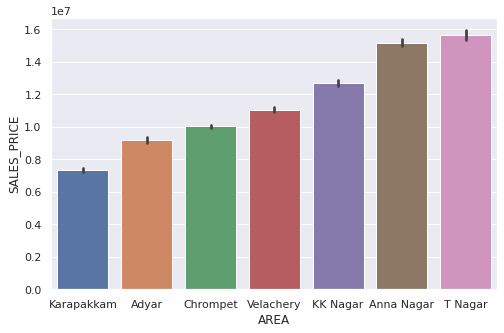

In [122]:
sns.set(rc = {'figure.figsize':(8,5)})
sns.barplot(x='AREA',y="SALES_PRICE",data=df1,order=df1.groupby("AREA")['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')["AREA"])

2. Parking Facility

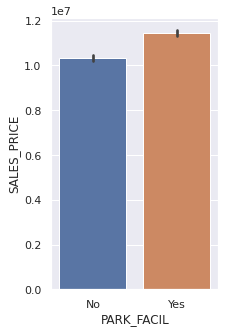

In [123]:
sns.set(rc = {'figure.figsize':(3,5)})
sns.barplot(x='PARK_FACIL',y="SALES_PRICE",data=df1,order=df1.groupby("PARK_FACIL")['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')["PARK_FACIL"])

3. Sales Condition

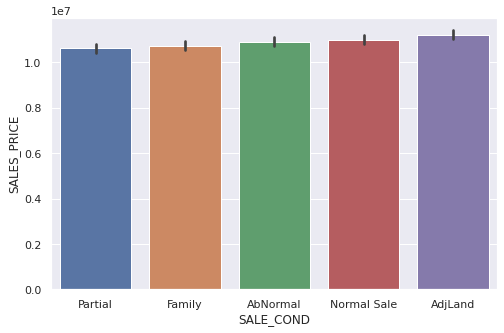

In [124]:
sns.set(rc = {'figure.figsize':(8,5)})
sns.barplot(x='SALE_COND',y="SALES_PRICE",data=df1,order=df1.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])

4. Building Type

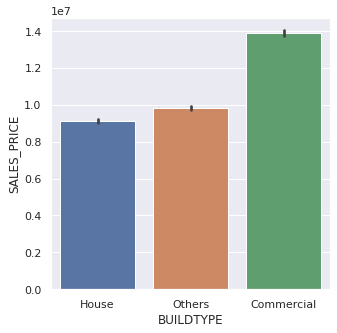

In [125]:
sns.set(rc = {'figure.figsize':(5,5)})
sns.barplot(x='BUILDTYPE',y="SALES_PRICE",data=df1,order=df1.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])

5. Utility Available

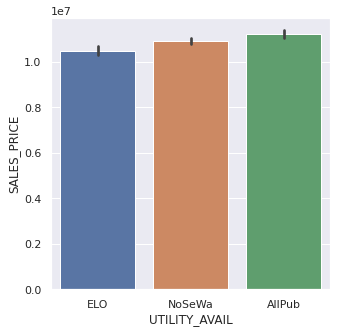

In [126]:
sns.set(rc = {'figure.figsize':(5,5)})
sns.barplot(x='UTILITY_AVAIL',y="SALES_PRICE",data=df1,order=df1.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])

6. Street

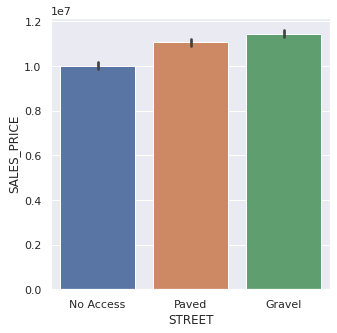

In [127]:
sns.set(rc = {'figure.figsize':(5,5)})
sns.barplot(x='STREET',y="SALES_PRICE",data=df1,order=df1.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])

7. MZZONE

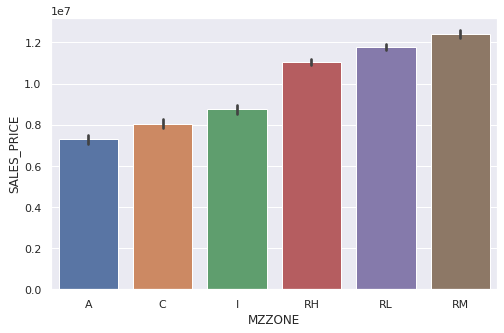

In [128]:
sns.set(rc = {'figure.figsize':(8,5)})
sns.barplot(x='MZZONE',y="SALES_PRICE",data=df1,order=df1.groupby("MZZONE")['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')["MZZONE"])

**Features Outliers**



*  First of all we check for outliers in target column.ie, *SALES_PRICE*




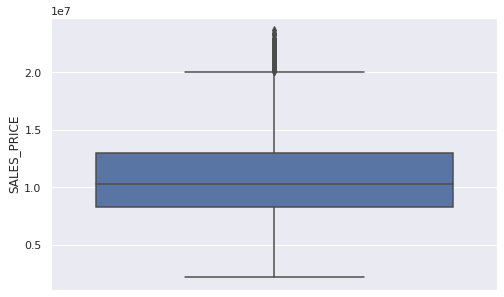

In [129]:
sns.boxplot(y=df1['SALES_PRICE'])

***Observations:***

* There are some outliers in the target column, but they are negligible as shown 
in the box plot.

* Now check outliers for all the feature columns.

**Each feature outliers against SALES PRICE plots are shown below.**

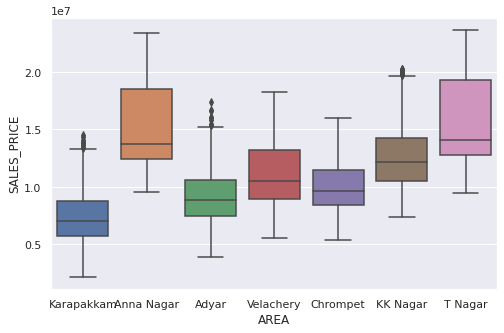

In [130]:
sns.boxplot(x=df1['AREA'],y=df1['SALES_PRICE'])

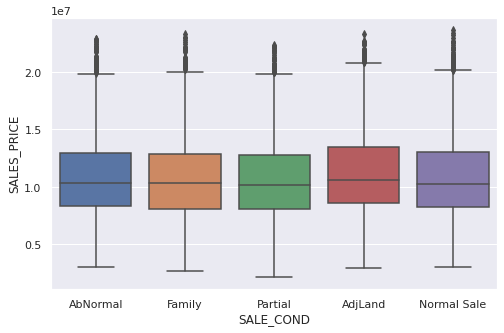

In [131]:
sns.boxplot(x=df1['SALE_COND'],y=df1['SALES_PRICE'])

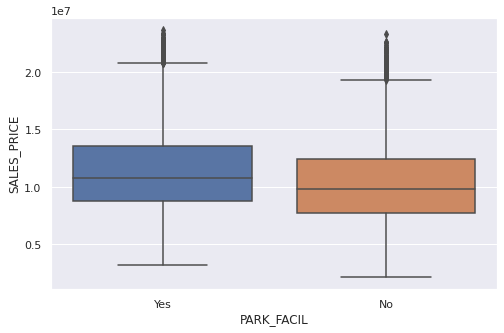

In [132]:
sns.boxplot(x=df1['PARK_FACIL'],y=df1['SALES_PRICE'])

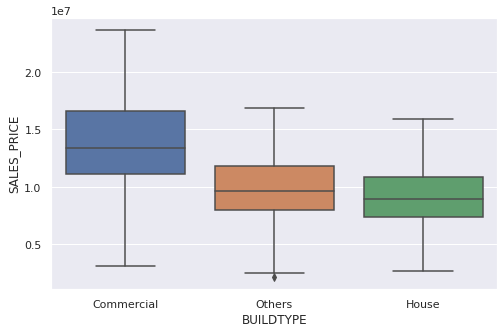

In [133]:
sns.boxplot(x=df1['BUILDTYPE'],y=df1['SALES_PRICE'])

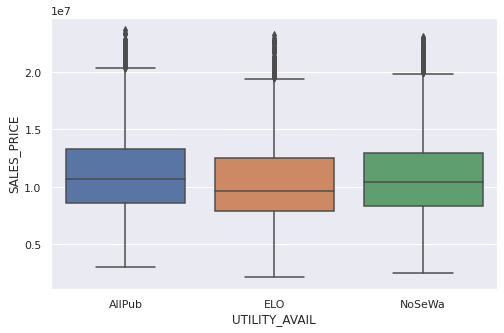

In [134]:
sns.boxplot(x=df1['UTILITY_AVAIL'],y=df1['SALES_PRICE'])

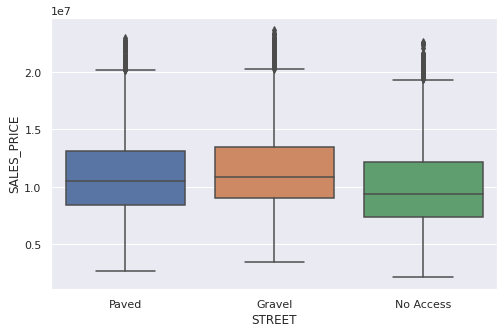

In [135]:
sns.boxplot(x=df1['STREET'],y=df1['SALES_PRICE'])

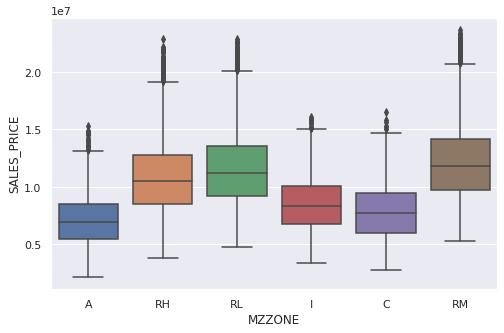

In [136]:
sns.boxplot(x=df1['MZZONE'],y=df1['SALES_PRICE'])


Now the numerical column box plots are shown below

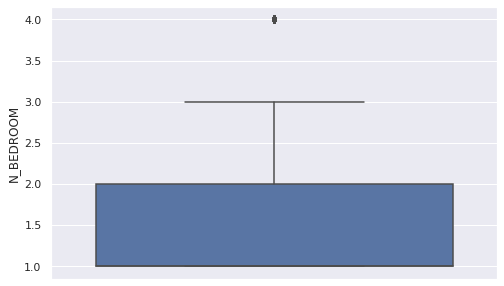

In [137]:
sns.boxplot(y=df1['N_BEDROOM'])

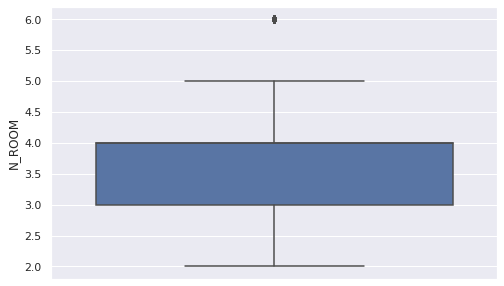

In [138]:
sns.boxplot(y=df1['N_ROOM'])

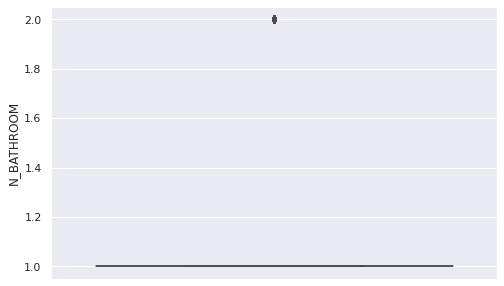

In [139]:
sns.boxplot(y=df1['N_BATHROOM'])

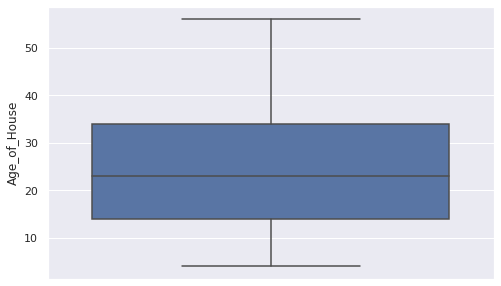

In [140]:
sns.boxplot(y=df1['Age_of_House'])

***Observations:***
* Box plots of all the features shows that there are only negligible outliers in the features.

**CORRELATION BETWEEN THE FEATURES:** Linear relationship between the features is visualized using heat map.

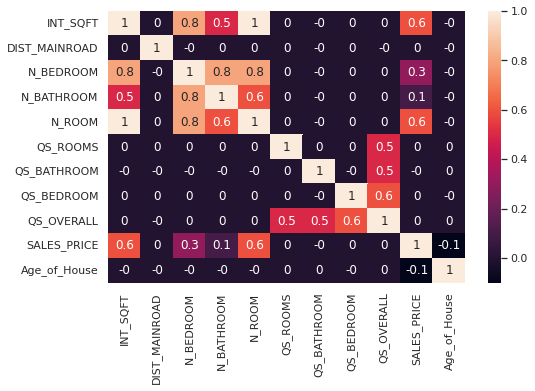

In [141]:
corr_matrix=df1.corr().round(1)
corr_matrix
sns.heatmap(data=corr_matrix, annot=True)

**Observations:**
* From the heat map it is clear that INT_SQFT and N_ROOM are the most correlatad features.

***We need to check the distribution of numerical features to understand the if the is a linear relationship with the target variable.***

*   There are two types of numerical features, that are discrete and continuous.
*   First we need to seperate continuous and discrete numerical features and plot distributions



**Numerical Features:**

In [142]:
numerical_features = [feature for feature in df1.columns if df1[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
numerical_features=df1[numerical_features]
numerical_features

Number of numerical variables:  11


,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,Age_of_House
0,1004,131,1.0,1.0,3,4.0,3.9,4.9,4.330,7600000,44.0
1,1986,26,2.0,1.0,5,4.9,4.2,2.5,3.765,21717770,11.0
2,909,70,1.0,1.0,3,4.1,3.8,2.2,3.090,13159200,20.0
3,1855,14,3.0,2.0,5,4.7,3.9,3.6,4.010,9630290,22.0
4,1226,84,1.0,1.0,3,3.0,2.5,4.1,3.290,7406250,30.0
...,...,...,...,...,...,...,...,...,...,...,...
7104,598,51,1.0,1.0,2,3.0,2.2,2.4,2.520,5353000,49.0
7105,1897,52,3.0,2.0,5,3.6,4.5,3.3,3.920,10818480,9.0
7106,1614,152,2.0,1.0,4,4.3,4.2,2.9,3.840,8351410,29.0
7107,787,40,1.0,1.0,2,4.6,3.8,4.1,4.160,8507000,31.0


**Separating Discrete features:**

In [143]:
discrete_feature=[feature for feature in numerical_features if len(df1[feature].unique())<20 ]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
discrete_feature

Discrete Variables Count: 3


['N_BEDROOM', 'N_BATHROOM', 'N_ROOM']

**Separating Continuous features:**

In [144]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))
continuous_feature

Continuous feature Count 8


['INT_SQFT',
 'DIST_MAINROAD',
 'QS_ROOMS',
 'QS_BATHROOM',
 'QS_BEDROOM',
 'QS_OVERALL',
 'SALES_PRICE',
 'Age_of_House']

**Discrete features v/s SALES_PRICE:**

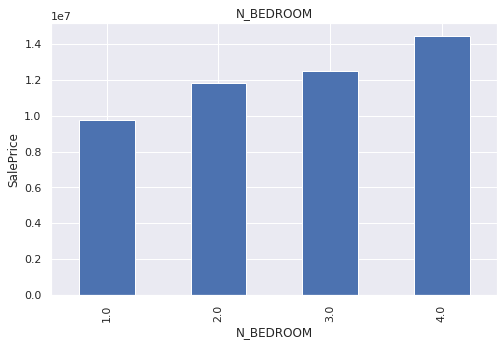

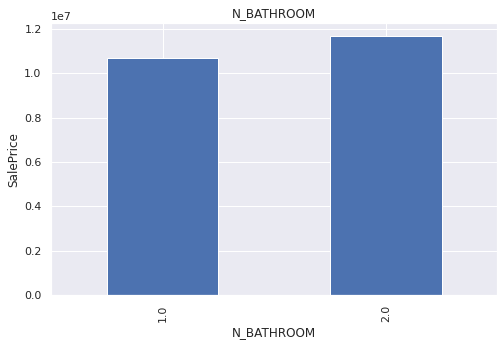

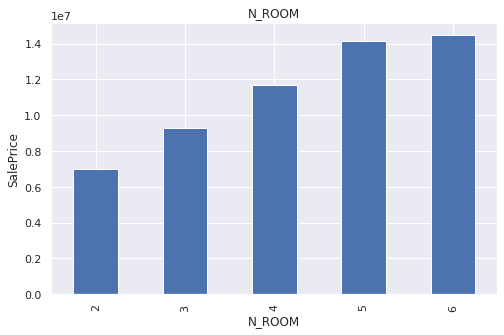

In [145]:
for feature in discrete_feature:
    df1.groupby(feature)['SALES_PRICE'].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

**Observations:**

*   All the discrete features *N_BEDROOM,N_BATHROOM* and *N_ROOM* have linear relationship with SALE_PRICE; hence they are all important features.



**Continuous Features and SALES_PRICE count:Histograms**

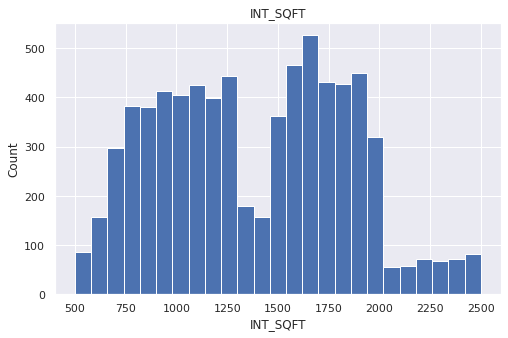

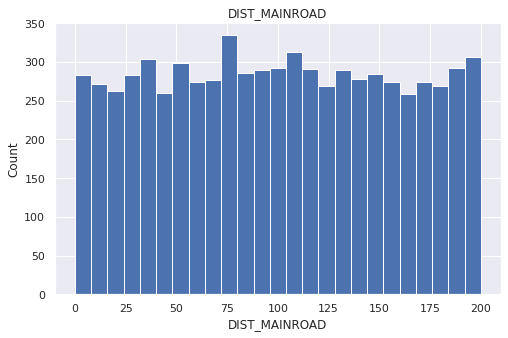

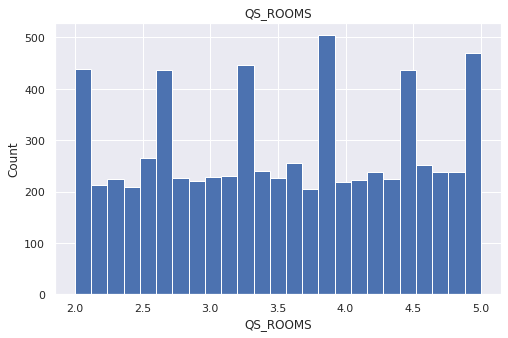

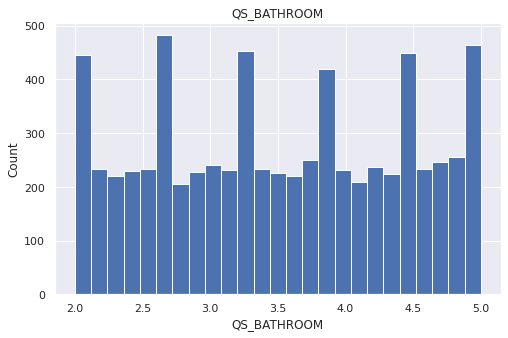

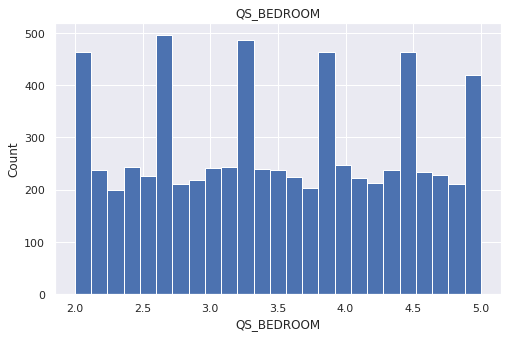

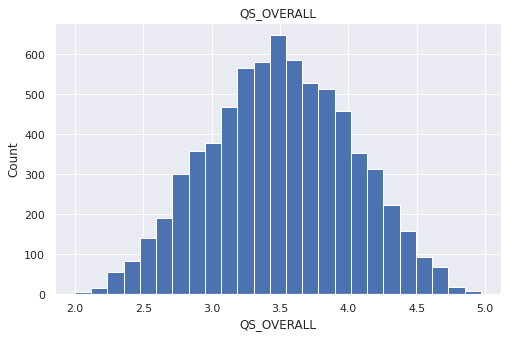

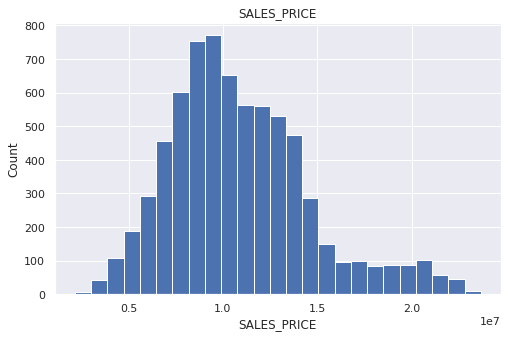

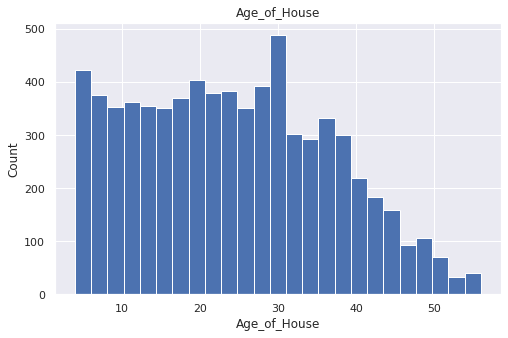

In [146]:
for feature in continuous_feature:
    df1[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

**Observations:**


1.   The data distribution of INT_SQFT feature is approximately normally distributed.
2.   The data distribution of Dist_Mainroad, QS_Rooms,QS_Bathrooms,QS_BedRoom and Age_of_House are not normally distributed.
3.   The data distribution of QS_overall and SALES_PRICE features are normally distributed, SALES_PRICE is right skewed as well.



**Continuous features v/S SALES_PRICE scatter plot to identify the linear relationship**

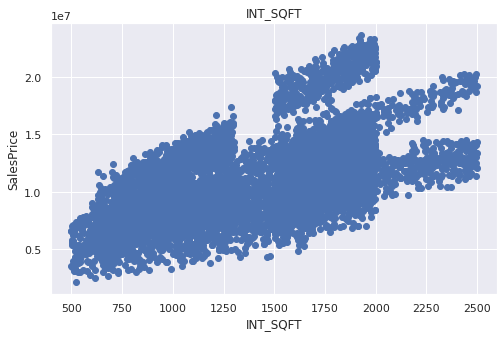

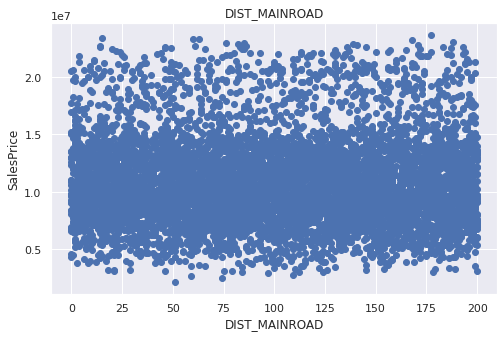

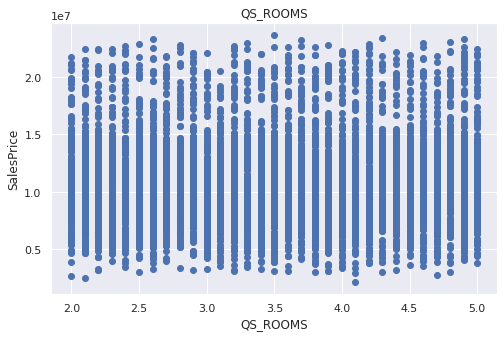

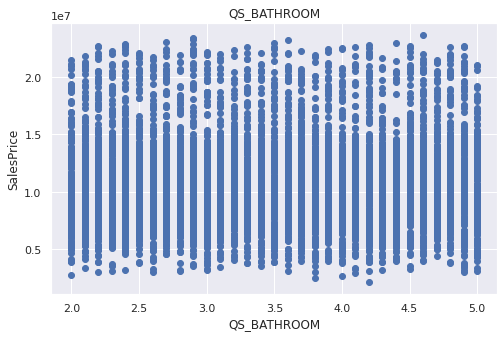

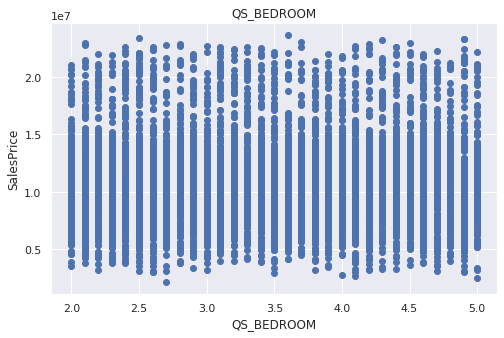

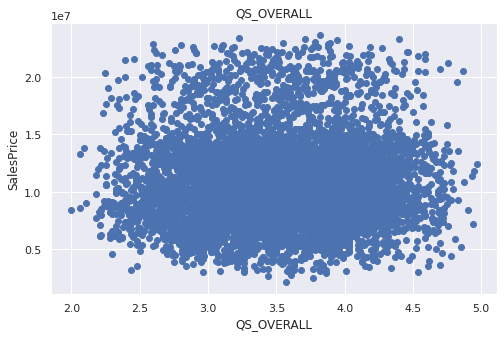

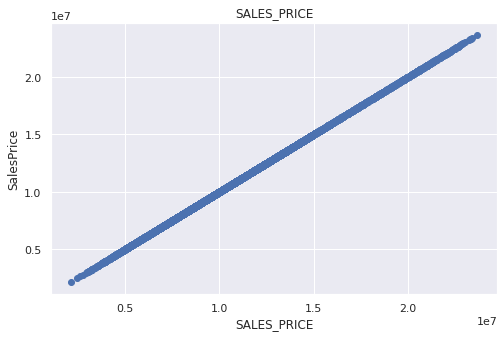

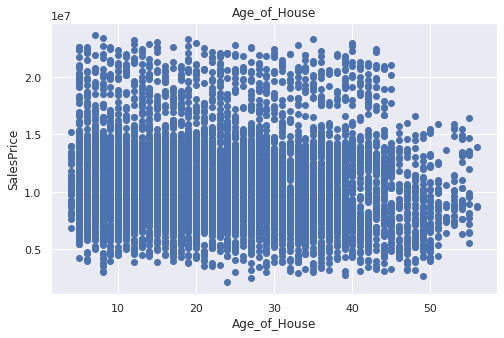

In [147]:
for feature in continuous_feature:
        plt.scatter(df1[feature],df1['SALES_PRICE'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

**Observations:**
*  There is a clear linear relationship between INT_SQFT and SALES_PRICE

**Age_of_House vs SALES_PRICE line plot:**

Text(0.5, 1.0, 'Age of House vs Sales Price')

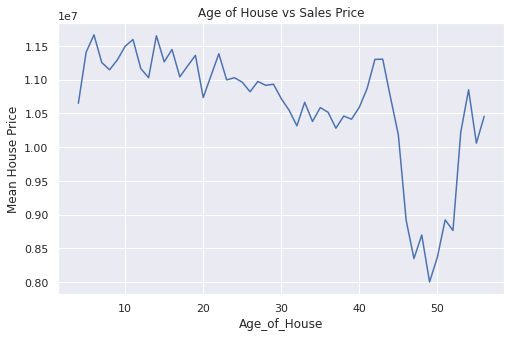

In [148]:
df1.groupby('Age_of_House')['SALES_PRICE'].mean().plot()
plt.xlabel('Age_of_House')
plt.ylabel('Mean House Price')
plt.title("Age of House vs Sales Price")

**Observations:**
*  *'QS_ROOMS','QS_BEDROOM','QS_OVERALL'* and *'QS_BATHROOM'* are not affecting the target variable (SALES_PRICE). Hence we can drop these columns

In [149]:
df2 = df1.copy()

In [150]:
df2 = df2.drop(columns=['QS_ROOMS','QS_BEDROOM','QS_OVERALL','QS_BATHROOM'])

**Separate Catagorical and Numerical values for the purpose of encoding**

Catagorical:

In [151]:
cat=df2[['AREA','UTILITY_AVAIL','PARK_FACIL','BUILDTYPE','STREET','SALE_COND','MZZONE']]
cat.head()

,AREA,UTILITY_AVAIL,PARK_FACIL,BUILDTYPE,STREET,SALE_COND,MZZONE
0,Karapakkam,AllPub,Yes,Commercial,Paved,AbNormal,A
1,Anna Nagar,AllPub,No,Commercial,Gravel,AbNormal,RH
2,Adyar,ELO,Yes,Commercial,Gravel,AbNormal,RL
3,Velachery,NoSeWa,No,Others,Paved,Family,I
4,Karapakkam,AllPub,Yes,Others,Gravel,AbNormal,C


Numerical:

In [152]:
num=df2[["INT_SQFT","SALES_PRICE","Age_of_House","N_BEDROOM","N_ROOM","N_BATHROOM","DIST_MAINROAD"]]
num.head()

,INT_SQFT,SALES_PRICE,Age_of_House,N_BEDROOM,N_ROOM,N_BATHROOM,DIST_MAINROAD
0,1004,7600000,44.0,1.0,3,1.0,131
1,1986,21717770,11.0,2.0,5,1.0,26
2,909,13159200,20.0,1.0,3,1.0,70
3,1855,9630290,22.0,3.0,5,2.0,14
4,1226,7406250,30.0,1.0,3,1.0,84


# ENCODING

1. Label Encoding for categorical continuous variables:

In [153]:
cat1=df2[['AREA','UTILITY_AVAIL','PARK_FACIL','STREET','SALE_COND','MZZONE']]
cat1['AREA'] = cat1['AREA'].replace(["Karapakkam","Adyar","Chrompet","Velachery","KK Nagar","Anna Nagar","T Nagar"],[1,2,3,4,5,6,7])
cat1['PARK_FACIL'] = cat1['PARK_FACIL'].replace(["Yes","No"],[1,0])
cat1['UTILITY_AVAIL'] = cat1['UTILITY_AVAIL'].replace(["ELO","NoSeWa","AllPub"],[1,2,3])
cat1['STREET'] = cat1['STREET'].replace(["No Access","Paved","Gravel"],[1,2,3])
cat1['SALE_COND'] = cat1['SALE_COND'].replace(["Partial","Family","AbNormal","Normal Sale","AdjLand"],[1,2,3,4,5])
cat1['MZZONE'] = cat1['MZZONE'].replace(["A","C","I","RH","RL","RM"],[1,2,3,4,5,6])
cat1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,AREA,UTILITY_AVAIL,PARK_FACIL,STREET,SALE_COND,MZZONE
0,1,3,1,2,3,1
1,6,3,0,3,3,4
2,2,1,1,3,3,5
3,4,2,0,2,2,3
4,1,3,1,3,3,2
...,...,...,...,...,...,...
7104,1,1,0,1,5,6
7105,4,2,1,1,2,4
7106,4,2,0,3,4,3
7107,1,1,1,2,1,5


One hot encoding for Catagorical Discrete features:

In [154]:
one_hot_encoded = pd.get_dummies(cat['BUILDTYPE'])
one_hot_encoded.head()

,Commercial,House,Others
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,0,0,1


Merging Label encoded and One hot encoded catagorical dataframes:

In [155]:
encoded=pd.merge(cat1,one_hot_encoded,left_index = True,right_index = True)
encoded.head()

,AREA,UTILITY_AVAIL,PARK_FACIL,STREET,SALE_COND,MZZONE,Commercial,House,Others
0,1,3,1,2,3,1,1,0,0
1,6,3,0,3,3,4,1,0,0
2,2,1,1,3,3,5,1,0,0
3,4,2,0,2,2,3,0,0,1
4,1,3,1,3,3,2,0,0,1


Merging the Encoded catagorical dataframe and Numerical dataframe together:

In [156]:
X=pd.merge(encoded,num,left_index=True,right_index=True)
X.head()

,AREA,UTILITY_AVAIL,PARK_FACIL,STREET,SALE_COND,MZZONE,Commercial,House,Others,INT_SQFT,SALES_PRICE,Age_of_House,N_BEDROOM,N_ROOM,N_BATHROOM,DIST_MAINROAD
0,1,3,1,2,3,1,1,0,0,1004,7600000,44.0,1.0,3,1.0,131
1,6,3,0,3,3,4,1,0,0,1986,21717770,11.0,2.0,5,1.0,26
2,2,1,1,3,3,5,1,0,0,909,13159200,20.0,1.0,3,1.0,70
3,4,2,0,2,2,3,0,0,1,1855,9630290,22.0,3.0,5,2.0,14
4,1,3,1,3,3,2,0,0,1,1226,7406250,30.0,1.0,3,1.0,84


In [157]:
X.shape

(7109, 16)

**Separating independent variables and dependent variable:**

In [158]:
Y=X['SALES_PRICE']  #Dependent variable (target)
Y

0        7600000
1       21717770
2       13159200
3        9630290
4        7406250
          ...   
7104     5353000
7105    10818480
7106     8351410
7107     8507000
7108     9976480
Name: SALES_PRICE, Length: 7109, dtype: int64

In [159]:
X=X.drop(columns='SALES_PRICE') # Independent variables
X.head()

,AREA,UTILITY_AVAIL,PARK_FACIL,STREET,SALE_COND,MZZONE,Commercial,House,Others,INT_SQFT,Age_of_House,N_BEDROOM,N_ROOM,N_BATHROOM,DIST_MAINROAD
0,1,3,1,2,3,1,1,0,0,1004,44.0,1.0,3,1.0,131
1,6,3,0,3,3,4,1,0,0,1986,11.0,2.0,5,1.0,26
2,2,1,1,3,3,5,1,0,0,909,20.0,1.0,3,1.0,70
3,4,2,0,2,2,3,0,0,1,1855,22.0,3.0,5,2.0,14
4,1,3,1,3,3,2,0,0,1,1226,30.0,1.0,3,1.0,84


**Splitting the data into train and test data**

In [160]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.20,random_state = 0)
print("xtrain shape : ", X_train.shape)
print("xtest shape : ", X_test.shape)
print("ytrain shape : ", Y_train.shape)
print("ytest shape : ", Y_test.shape)

xtrain shape :  (5687, 15)
xtest shape :  (1422, 15)
ytrain shape :  (5687,)
ytest shape :  (1422,)


**Scaling the data (Using standard scaler)**

In [161]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

# **Model Fitting**

**1. Linear Regression**

In [162]:
regressor = LinearRegression(fit_intercept=True)
regressor.fit(X_train,Y_train)
Y_pred1 = regressor.predict(X_test)

In [163]:
coefficients_linear = pd.DataFrame(regressor.coef_,X.columns)
coefficients_linear.columns = ['Coefficients of linear regression']
coefficients_linear

,Coefficients of linear regression
AREA,1.074479e+06
UTILITY_AVAIL,4.788228e+04
PARK_FACIL,5.243863e+05
STREET,4.028311e+05
SALE_COND,2.250710e+05
MZZONE,8.680910e+05
Commercial,1.354173e+06
House,-8.468660e+05
Others,-5.031723e+05
INT_SQFT,6.454172e+05


Observations:

AREA,N_ROOM,N_BEDROOM and Commercial building type has maximum coefficient value. They are more important features in prediction

**Actual value vs Predicted value:**

In [164]:
data1 = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred1})
data1

,Actual,Predicted
3913,13376150,1.415447e+07
2726,12857440,1.350237e+07
6220,19124310,1.855078e+07
2716,4905000,4.414822e+06
5459,13534450,1.308068e+07
...,...,...
3524,9987005,1.022748e+07
3010,5821000,6.203872e+06
66,13364730,1.388652e+07
1642,17115030,1.574625e+07


Actual value vs Predicted value scatter plot:

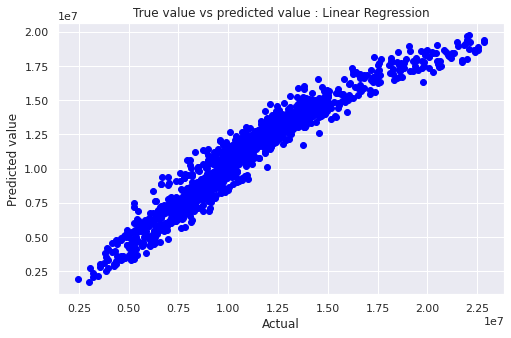

In [165]:
plt.scatter(Y_test, Y_pred1, c = 'blue')
plt.xlabel("Actual")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()

sns.regplot(x=Y_test,y=Y_pred1,marker='*',color='green')

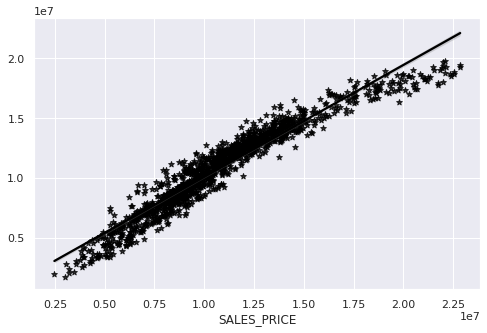

In [166]:
sns.regplot(x=Y_test,y=Y_pred1,marker='*',color='black')

**Observations:**

Relation between actual sales price and predicted sales price is linear.

Linear regression model evaluation:

In [167]:

print('R2- SCORE:', metrics.r2_score(Y_test,Y_pred1))

R2- SCORE: 0.9258513905270569


**2. Random Forest Regression:**

[0.9858932916196125,
 0.987963015412288,
 0.9887255478474591,
 0.988767699634063,
 0.9888643224662057,
 0.9890634141101009,
 0.9890012911378196,
 0.9889979304511053,
 0.9893134906982515,
 0.9891943511074365,
 0.989240673317894,
 0.989206181368397,
 0.9892371295333854,
 0.9891138737066604,
 0.9890723973259337,
 0.9893352408580781,
 0.9892045096328175,
 0.9893357322665346,
 0.9892358965857195]

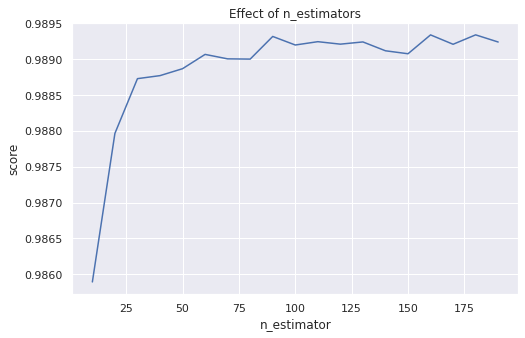

In [168]:
model = RandomForestRegressor()
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, Y_train)
    scores.append(model.score(X_test, Y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)
scores

In [169]:
modelrf = RandomForestRegressor()
modelrf.fit(X_train, Y_train)

RandomForestRegressor()

In [170]:
c=modelrf.predict(X_test)
print('R2- SCORE:', metrics.r2_score(Y_test,c))

R2- SCORE: 0.9890986349770717


**3. Decision Tree:**

In [171]:
modeldt = DecisionTreeRegressor()

modeldt.fit(X_train,Y_train)
b = modeldt.predict(X_test)

In [172]:
print('R2- SCORE:', metrics.r2_score(Y_test,b))

R2- SCORE: 0.9723939256110967


**4. XGBOOST:**

In [173]:
Xgb=XGBRegressor()
Xgb.fit(X_train,Y_train)
pred=Xgb.predict(X_test)
print('R2- SCORE:', metrics.r2_score(Y_test,pred))

[01:27:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2- SCORE: 0.9921709520638918


**5. KNN:**

In [174]:
from sklearn.neighbors import KNeighborsRegressor
modelknn = KNeighborsRegressor()
modelknn.fit(X_train, Y_train)
k= modelknn.predict(X_test)

In [175]:
print('R2- SCORE:', metrics.r2_score(Y_test,k))

R2- SCORE: 0.943283272772447


**Observation:**

By fitting five machine learning regression models R2 SCORES are as follows.

*Linear Regression:* 0.9258513905270569

*Dicision Tree Regression:* 0.9724980483182627

*Random Forest Regression:* 0.9891164355274773

*XGBoost Regression:* 0.9921709520638918

*KNN Regression:* 0.943283272772447

* Out of the five machine learning algorithm fitted above, **XGBoost** gives the best **R^2 value** which is **0.9921709520638918**

**Cross Valued Score:**

In [177]:
from sklearn.model_selection import cross_val_score
cross_val_score(regressor,X_train,Y_train,scoring='r2',cv=5)

array([0.91823645, 0.92222203, 0.92560326, 0.91997209, 0.92518656])

**Prediction of Range of House Price in Chennai**

Range of house price is predicted using standard deviation.

In [178]:
lr_model=LinearRegression()
lr_model.fit(X_train,Y_train)

LinearRegression()

Standard Deviation

In [179]:
s=np.std(Y_train)
interval=1.96*s

In [180]:
b0,b1=lr_model.coef_,lr_model.intercept_
reg=X_train*b0 + b1
to_pred=X_test[0]
lr_predicted=lr_model.predict([to_pred])
lower,upper=lr_predicted-interval,lr_predicted+interval
print(f'Predicted output range between:{lower} and {upper}')

Predicted output range between:[6729310.04604594] and [21579629.62123196]


# Summary

* Predicted range of House price  range is between:*[6729310.04604594]* and *[21579629.62123196]*

* All the area related features play a big role in house price.

* Distance from main road, Number of rooms,Number of bedrooms and the commercial type buildings play important role in house price.